In [18]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

## Old:

LEAD: 5


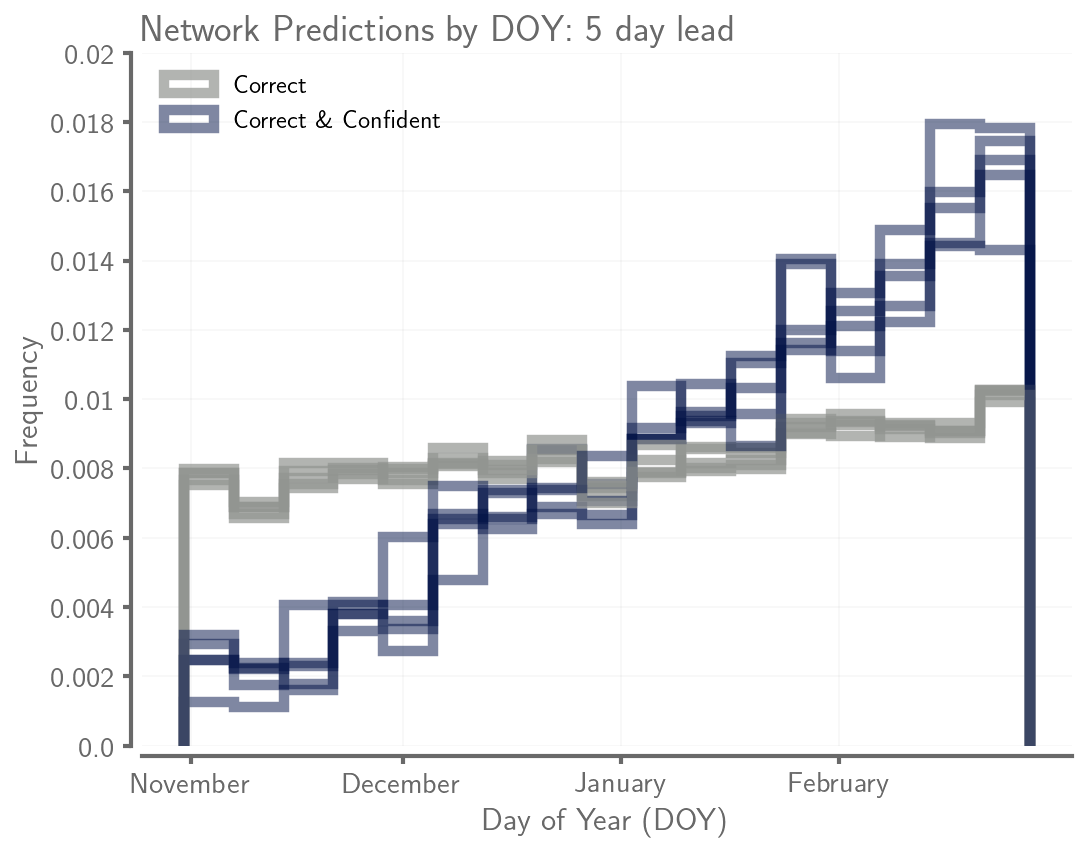

LEAD: 7


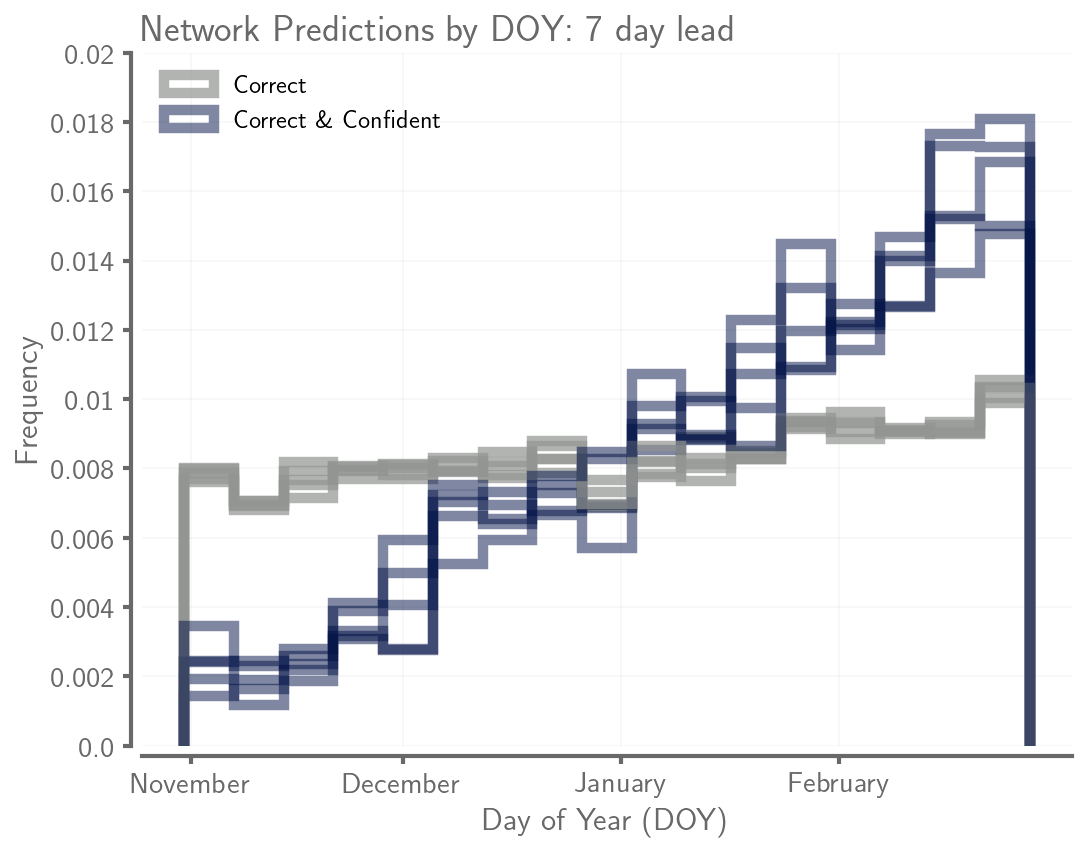

LEAD: 14


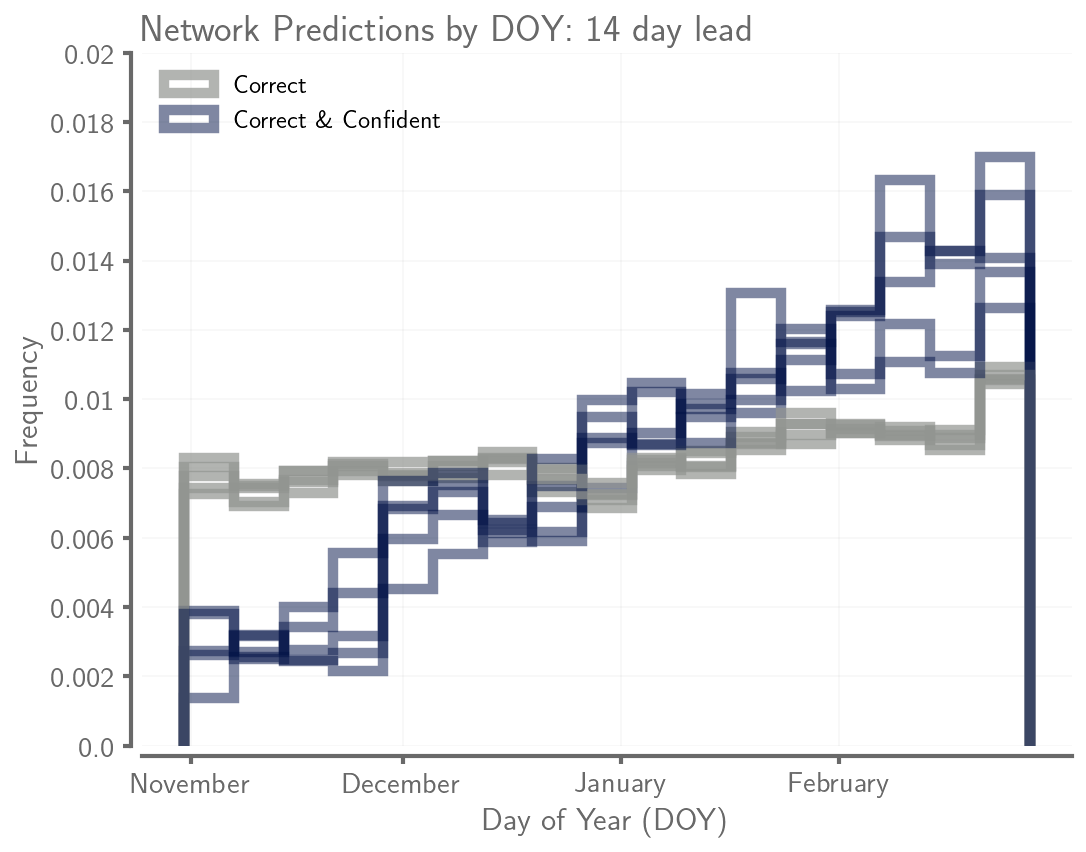

LEAD: 21


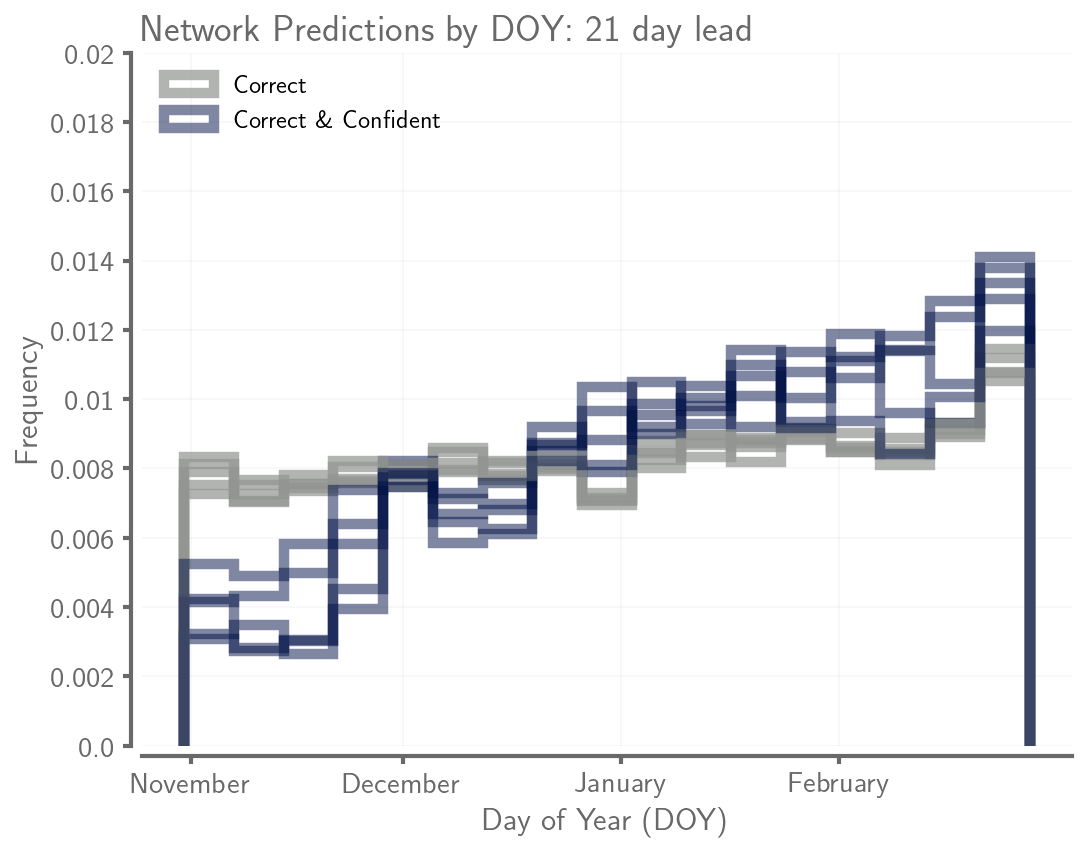

LEAD: 28


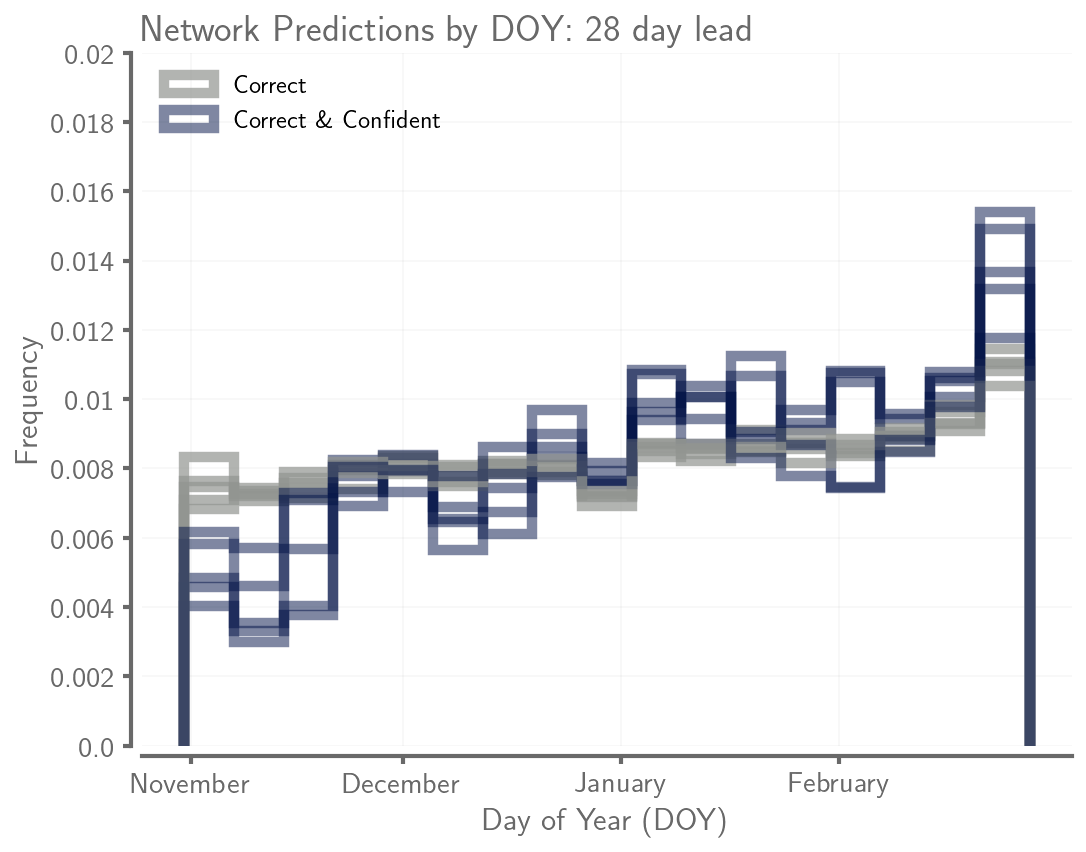

In [57]:
ddir = '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/doy_interpret/'
LEADS = [5,7,14,21,28] #np.arange(5,31)
AVGS = [2,7,14,21,28] #np.arange(2,29) 

for l in LEADS:
    print('LEAD: '+str(l))
    fig = plt.figure(figsize=(8,6))
    ax = fig.subplot_mosaic('''
                            A
                            ''') 
    adjust_spines(ax['A'], ['left', 'bottom'])
    ax['A'].spines['top'].set_color('none')
    ax['A'].spines['right'].set_color('none')
    ax['A'].spines['left'].set_color('dimgrey')
    ax['A'].spines['bottom'].set_color('dimgrey')
    ax['A'].spines['left'].set_linewidth(2)
    ax['A'].spines['bottom'].set_linewidth(2)
    for a in AVGS:
        finame_doycorr = 'doycorr_DOY_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
        check_corr_doy = np.load(ddir+finame_doycorr)
        finame_doyconfcorr = 'doyconfcorr_DOY_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
        check_confcorr_doy = np.load(ddir+finame_doyconfcorr)
        
        alldts = pd.date_range(start='11-01-2000',end='02-28-2001')
        labsy = pd.date_range(start='11-01-2000',end='02-28-2001',freq='MS')
        labsy_doy  = np.array(labsy.dayofyear)
        labsy_doy[labsy_doy<60]+=366

        if a == 2:
            plt.hist(check_corr_doy,histtype='step',linewidth=5,density=True,alpha=0.7,bins=17,color='xkcd:grey',label='Correct')
            plt.hist(check_confcorr_doy,histtype='step',linewidth=5,density=True,alpha=0.5,bins=17,color='xkcd:navy blue',label='Correct \& Confident')
            plt.title('Network Predictions by DOY: '+str(l)+' day lead',color='dimgrey',loc='left')
            plt.legend(fontsize=12,frameon=False,loc='upper left')
        else:
            plt.hist(check_corr_doy,histtype='step',linewidth=5,density=True,alpha=0.7,bins=17,color='xkcd:grey')
            plt.hist(check_confcorr_doy,histtype='step',linewidth=5,density=True,alpha=0.5,bins=17,color='xkcd:navy blue')

        plt.grid(True,alpha=0.1)

        ax['A'].set_ylabel('Frequency',color='dimgrey')
        ax['A'].set_xlabel('Day of Year (DOY)',color='dimgrey')
        ax['A'].tick_params('both',length=4,width=2,which='major',color='dimgrey')
        ax['A'].set_xticks(labsy_doy,['November','December','January','February'],rotation=0,fontsize=14,color='dimgrey')
        ax['A'].set_yticks(np.arange(0.,0.022,0.002), np.round(np.arange(0.,0.022,0.002),3),fontsize=14,color='dimgrey')
    # plt.savefig('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/plots/doy_main_final.png',dpi=300,bbox_inches='tight')
    plt.show()



## Make four panel plot:

In [ ]:
alldts = pd.date_range(start='11-01-2000',end='02-28-2001')
labsy = pd.date_range(start='11-01-2000',end='02-28-2001',freq='MS')
labsy_doy  = np.array(labsy.dayofyear)
labsy_doy[labsy_doy<60]+=366

In [61]:
ddir = '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/doy_interpret/'
LEADS = [7,14,21,28] #[5,7,14,21,28]
AVGS = np.arange(2,29) 


for a in AVGS:
    finame_doycorr = 'doycorr_DOY_LEAD_7_AVG_'+str(a)+'__00001-00005.npy'
    finame_doyconfcorr = 'doyconfcorr_DOY_LEAD_7_AVG_'+str(a)+'__00001-00005.npy'
    if a == 2:
        corr_doy_l7 = np.load(ddir+finame_doycorr)
        confcorr_doy_l7 = np.load(ddir+finame_doyconfcorr)
    else:
        corr_doy_l7 = np.append(corr_doy_l7,np.load(ddir+finame_doycorr),axis=0)
        confcorr_doy_l7 = np.append(confcorr_doy_l7,np.load(ddir+finame_doyconfcorr),axis=0)
        
        
for a in AVGS:
    finame_doycorr = 'doycorr_DOY_LEAD_14_AVG_'+str(a)+'__00001-00005.npy'
    finame_doyconfcorr = 'doyconfcorr_DOY_LEAD_14_AVG_'+str(a)+'__00001-00005.npy'
    if a == 2:
        corr_doy_l14 = np.load(ddir+finame_doycorr)
        confcorr_doy_l14 = np.load(ddir+finame_doyconfcorr)
    else:
        corr_doy_l14 = np.append(corr_doy_l14,np.load(ddir+finame_doycorr),axis=0)
        confcorr_doy_l14 = np.append(confcorr_doy_l14,np.load(ddir+finame_doyconfcorr),axis=0)
        
        
for a in AVGS:
    finame_doycorr = 'doycorr_DOY_LEAD_21_AVG_'+str(a)+'__00001-00005.npy'
    finame_doyconfcorr = 'doyconfcorr_DOY_LEAD_21_AVG_'+str(a)+'__00001-00005.npy'
    if a == 2:
        corr_doy_l21 = np.load(ddir+finame_doycorr)
        confcorr_doy_l21 = np.load(ddir+finame_doyconfcorr)
    else:
        corr_doy_l21 = np.append(corr_doy_l21,np.load(ddir+finame_doycorr),axis=0)
        confcorr_doy_l21 = np.append(confcorr_doy_l21,np.load(ddir+finame_doyconfcorr),axis=0)
        
        
for a in AVGS:
    finame_doycorr = 'doycorr_DOY_LEAD_28_AVG_'+str(a)+'__00001-00005.npy'
    finame_doyconfcorr = 'doyconfcorr_DOY_LEAD_28_AVG_'+str(a)+'__00001-00005.npy'
    if a == 2:
        corr_doy_l28 = np.load(ddir+finame_doycorr)
        confcorr_doy_l28 = np.load(ddir+finame_doyconfcorr)
    else:
        corr_doy_l28 = np.append(corr_doy_l28,np.load(ddir+finame_doycorr),axis=0)
        confcorr_doy_l28 = np.append(confcorr_doy_l28,np.load(ddir+finame_doyconfcorr),axis=0)

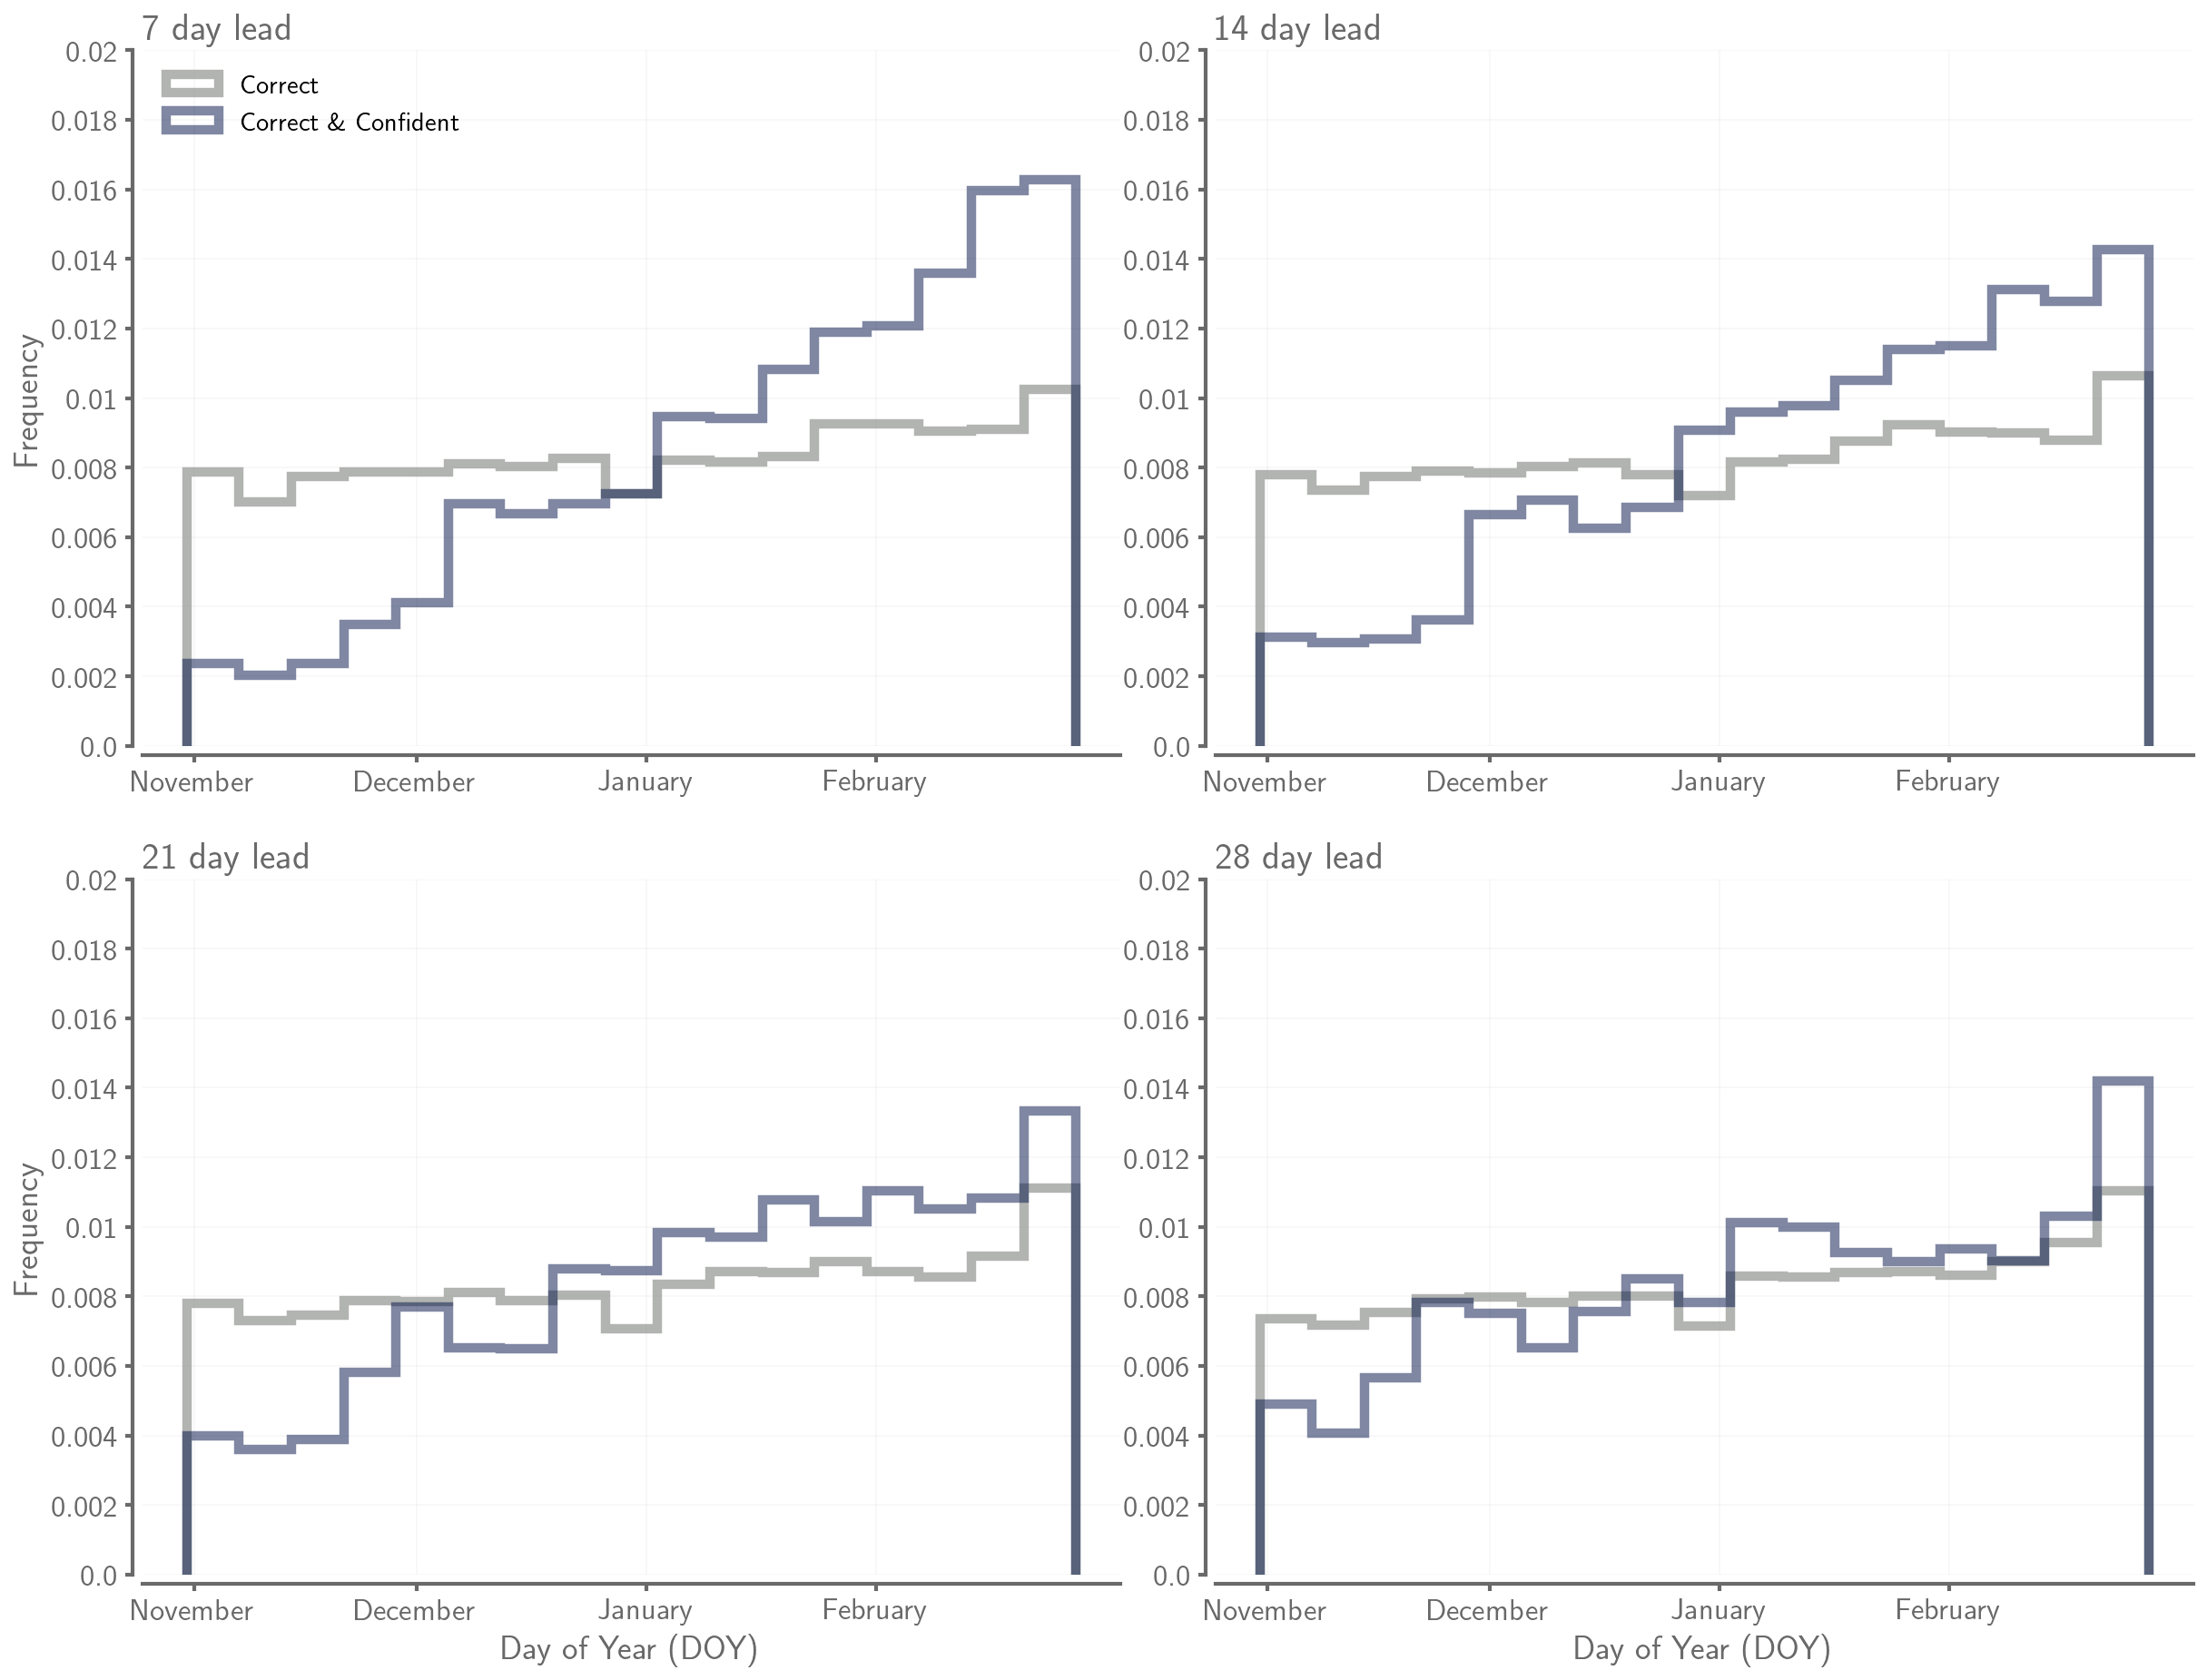

In [73]:
fig = plt.figure(figsize=(16,12))
ax = fig.subplot_mosaic('''
                        AB
                        CD
                        ''') 
plt.tight_layout(w_pad=1,h_pad=3)
for loc in ['A','B','C','D']:
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].set_yticks(np.arange(0.,0.022,0.002), np.round(np.arange(0.,0.022,0.002),3),fontsize=16,color='dimgrey')
    ax[loc].set_ylim(0,0.02)
    ax[loc].set_xticks(labsy_doy,['November','December','January','February'],rotation=0,fontsize=16,color='dimgrey')

    if loc in ['A','C']:
        ax[loc].set_ylabel('Frequency',color='dimgrey',fontsize=18)
    if loc in ['C','D']:
        ax[loc].set_xlabel('Day of Year (DOY)',color='dimgrey',fontsize=18)
        
    ax[loc].grid(True,alpha=0.1)

ax['A'].hist(corr_doy_l7,histtype='step',linewidth=5,density=True,alpha=0.7,bins=17,color='xkcd:grey',label='Correct')
ax['A'].hist(confcorr_doy_l7,histtype='step',linewidth=5,density=True,alpha=0.5,bins=17,color='xkcd:navy blue',label='Correct \& Confident')
ax['A'].set_title('7 day lead',color='dimgrey',loc='left',fontsize=20)
ax['A'].legend(fontsize=14,frameon=False,loc='upper left')

ax['B'].hist(corr_doy_l14,histtype='step',linewidth=5,density=True,alpha=0.7,bins=17,color='xkcd:grey')
ax['B'].hist(confcorr_doy_l14,histtype='step',linewidth=5,density=True,alpha=0.5,bins=17,color='xkcd:navy blue')
ax['B'].set_title('14 day lead',color='dimgrey',loc='left',fontsize=20)

ax['C'].hist(corr_doy_l21,histtype='step',linewidth=5,density=True,alpha=0.7,bins=17,color='xkcd:grey')
ax['C'].hist(confcorr_doy_l21,histtype='step',linewidth=5,density=True,alpha=0.5,bins=17,color='xkcd:navy blue')
ax['C'].set_title('21 day lead',color='dimgrey',loc='left',fontsize=20)

ax['D'].hist(corr_doy_l28,histtype='step',linewidth=5,density=True,alpha=0.7,bins=17,color='xkcd:grey')
ax['D'].hist(confcorr_doy_l28,histtype='step',linewidth=5,density=True,alpha=0.5,bins=17,color='xkcd:navy blue')
ax['D'].set_title('28 day lead',color='dimgrey',loc='left',fontsize=20)


plt.savefig('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/plots/doyhist_main_final.png',dpi=300,bbox_inches='tight')
# plt.show()
